In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('data_for_student_case.csv')
df.shape
# df

(290382, 17)

In [18]:
# Remove confused transaction 
df = df[df['simple_journal'] != 'Refused']
df.info()
print(df[df['simple_journal'] == 'Settled'].count()["simple_journal"])
print(df[df['simple_journal'] == 'Chargeback'].count()["simple_journal"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237036 entries, 0 to 290381
Data columns (total 17 columns):
txid                            237036 non-null int64
bookingdate                     237036 non-null object
issuercountrycode               237032 non-null object
txvariantcode                   237036 non-null object
bin                             237036 non-null float64
amount                          237036 non-null float64
currencycode                    237036 non-null object
shoppercountrycode              236694 non-null object
shopperinteraction              237036 non-null object
simple_journal                  237036 non-null object
cardverificationcodesupplied    223842 non-null object
cvcresponsecode                 237036 non-null int64
creationdate                    237036 non-null object
accountcode                     237036 non-null object
mail_id                         237036 non-null object
ip_id                           237036 non-null object
card_id  

In [19]:
# Convert bookingdate and creation date (string) into datetime 
cols = ['bookingdate', 'creationdate']
for col in cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['creationdate'].describe()

count                  237036
unique                 232824
top       2015-08-22 10:12:01
freq                        6
first     2015-07-01 00:00:41
last      2015-10-31 23:59:12
Name: creationdate, dtype: object

Single variable exploration

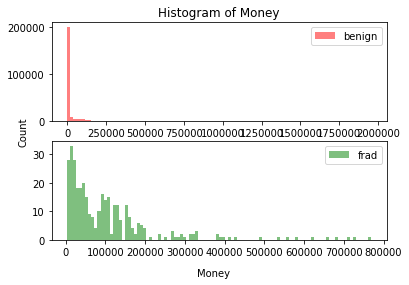

In [20]:
# Visualize money attribute
benign_data = df[df['simple_journal'] == 'Settled']
frad_data = df[df['simple_journal'] == 'Chargeback']

f, axarr = plt.subplots(2)
kwargs = dict(alpha=0.5, bins=100)
axarr[0].hist(benign_data['amount'], **kwargs, color='r', label='benign')
axarr[0].legend()
axarr[1].hist(frad_data['amount'], **kwargs, color='g', label='frad')
axarr[1].legend()
f.text(0.5, 0.01, 'Money', ha='center', va='center')
f.text(0.06, 0.5, 'Count', ha='center', va='center', rotation='vertical')
axarr[0].set_title("Histogram of Money")
# f.autofmt_xdate()
plt.show()

Bivariate analysis

     Settled  Chargeback
MX    9834.0       154.0
US     759.0         1.0
CA      48.0         0.0
AR      24.0         0.0
IT      98.0         0.0
NZ    4514.0         6.0
IL      28.0         0.0
DE     396.0         1.0
AE     212.0         0.0
BR      16.0         2.0
DK      91.0         0.0
AU   22488.0       115.0
ID      29.0         1.0
LB      18.0         0.0
HK     160.0         0.0
GB  175259.0        32.0
CN     258.0         0.0
SG     104.0         0.0
TH     153.0         1.0
PH      33.0         0.0
ES     303.0         0.0
SE   18134.0        28.0
SA     192.0         0.0
HR      23.0         0.0
MY      48.0         1.0
MO      12.0         0.0
KW      46.0         0.0
ZA      56.0         0.0
IE     169.0         0.0
IN      45.0         0.0
..       ...         ...
IM     280.0         0.0
EG      44.0         0.0
PL      41.0         0.0
BN      12.0         0.0
PK      15.0         0.0
LT      26.0         0.0
CH      74.0         0.0
BH      17.0         0.0


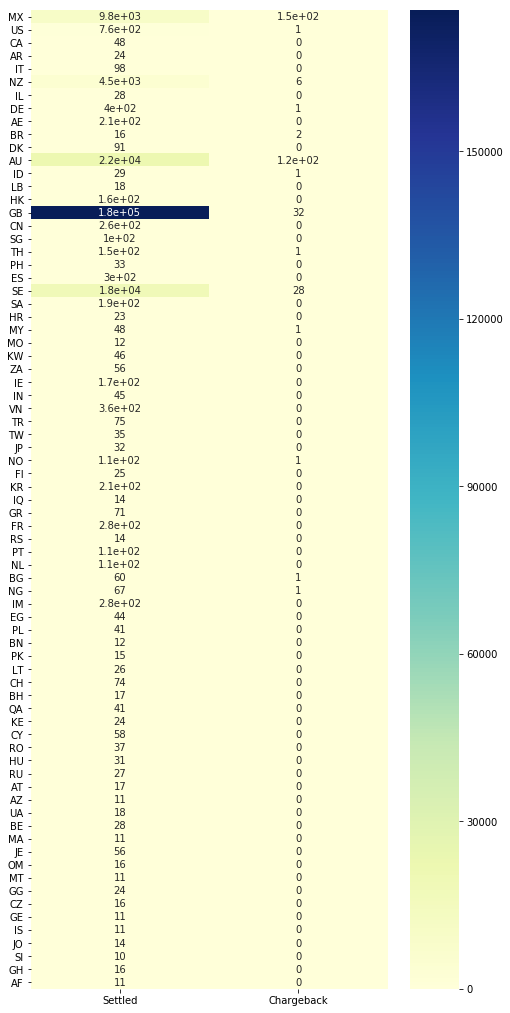

In [70]:
# country + simple_journal
country_list = df['shoppercountrycode'].unique()
result_list = ['Settled', 'Chargeback']
df_count = pd.DataFrame(index=country_list, columns=result_list, dtype='int64') # dataframe store counts
count = df.groupby(['shoppercountrycode','simple_journal']).size() # groupby count 

# Fill in 
for country in country_list:
    for result in result_list:
        if (country, result) in count:
            df_count.at[country, result] = int(count[country][result])
        else:
            df_count.at[country, result] = int(0)

# Drop countries which has less than 10 records             
df_count = df_count.drop(df_count[df_count['Settled'] + df_count['Chargeback'] < 10].index)
print(df_count)

# Plot heatmap
plt.figure(figsize=(8,18))
sns.heatmap(df_count, annot=True, cmap="YlGnBu")